# Prediksi pada Gambar Baru

In [1]:
import os
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore', category=UserWarning)
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))

from src.models.svm_classifier import load_model
from src.preprocessing.image_preprocessing import preprocess_image_for_feature_extraction
from src.features.feature_extraction import extract_features
from src.config import CLASSES, SAVED_MODEL_PATH

## Memuat Model yang Telah Dilatih

In [2]:
try:
    model = load_model()
    print(f"Model berhasil dimuat dari: {SAVED_MODEL_PATH}")
    print("\nIsi Pipeline Model:")
    print(model)
except FileNotFoundError as e:
    print(e)
    print("\nModel tidak ditemukan")

2025-09-30 19:56:06,643 - INFO - svm_classifier - Model berhasil dimuat dari c:\Users\HP\Documents\PythonProjects\ML\klasifikasi-cuaca-svm\svm\saved_models\svm_model.pkl


Model berhasil dimuat dari: c:\Users\HP\Documents\PythonProjects\ML\klasifikasi-cuaca-svm\svm\saved_models\svm_model.pkl

Isi Pipeline Model:
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.95, random_state=42)),
                ('svc',
                 SVC(C=10, class_weight='balanced', gamma=0.0001,
                     probability=True, random_state=42))])


## Fungsi untuk Prediksi Tunggal

Membuat fungsi pembungkus yang mengambil path gambar, melakukan semua langkah yang diperlukan (pra-pemrosesan, ekstraksi fitur), dan mengembalikan prediksi.

In [3]:
def predict_single_image(image_path, model):
    try:
        # Baca gambar
        image = cv2.imread(image_path)
        if image is None:
            print(f"Error: Tidak dapat membaca gambar di {image_path}")
            return None, None, None
        
        # 1. Pra-pemrosesan
        gray_img, color_img, _ = preprocess_image_for_feature_extraction(image)
        
        # 2. Ekstraksi Fitur
        features = extract_features(gray_img, color_img)
        features = features.reshape(1, -1) # Reshape untuk satu sampel
        
        # 3. Prediksi
        prediction_idx = model.predict(features)[0]
        predicted_class = CLASSES[prediction_idx]
        
        # 4. Dapatkan probabilitas/kepercayaan
        probabilities = model.predict_proba(features)[0]
        confidence = probabilities[prediction_idx]
        
        return predicted_class, confidence, image
        
    except Exception as e:
        print(f"Terjadi kesalahan saat memprediksi: {e}")
        return None, None, None

## Prediksi

Sekarang, tentukan path ke gambar baru Anda di bawah ini dan jalankan sel untuk melihat hasilnya. Pastikan Anda sudah meletakkan beberapa gambar di folder `data/new_images/`.

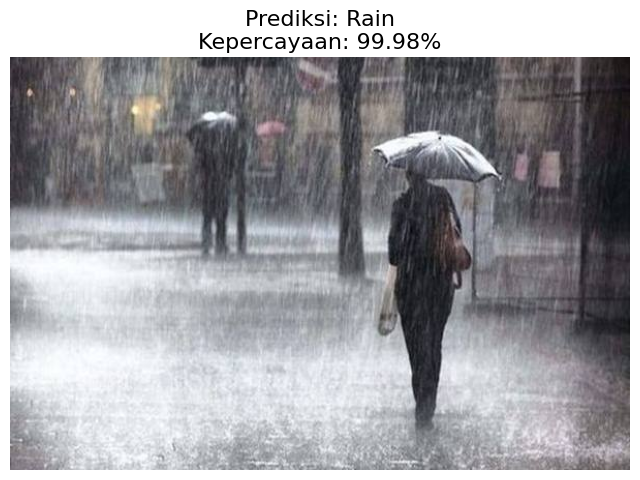

In [4]:
# --- GANTI PATH GAMBAR DI SINI ---
new_image_dir = '../data/new_images/'
# Ganti 'hujan6.jpg' dengan nama file gambar Anda
image_filename = 'hujan6.jpg' 
image_path_to_predict = os.path.join(new_image_dir, image_filename)
# -----------------------------------

if not os.path.exists(image_path_to_predict):
    print(f"Error: File tidak ditemukan di '{image_path_to_predict}'")
    print("Pastikan Anda telah meletakkan gambar di folder 'data/new_images/' dan nama filenya benar.")
else:
    predicted_class, confidence, loaded_image = predict_single_image(image_path_to_predict, model)

    if predicted_class:
        # Tampilkan hasil
        plt.figure(figsize=(8, 8))
        plt.imshow(cv2.cvtColor(loaded_image, cv2.COLOR_BGR2RGB))
        
        title_text = f"Prediksi: {predicted_class}\nKepercayaan: {confidence:.2%}"
        plt.title(title_text, fontsize=16)
        plt.axis('off')
        plt.show()